In [24]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Уровень 1
Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [9]:
df.shape

(891, 12)

In [10]:
df.Age.isna().sum()

177

у 177 пассажиров из 891 не указан возраст... не понятрно, что с этим делать.

считать % детей от всех пассажиров?

по мне, логически правильнее, считать % от пассажиров с указанным возрастом, их получается 714

In [12]:
count_young = df.Age.groupby(df.Age < 18).count() #посчитаем кол-во до 18 ('True') и после 18 ('False')) 

In [13]:
count_young

Age
False    601
True     113
Name: Age, dtype: int64

In [16]:
percent_of_children = count_young[1] / (count_young[0] + count_young[1]) * 100

In [25]:
print('Процент детей, которые были на Титанике (младше 18 лет) равен:', percent_of_children.round(2))

Процент детей, которые были на Титанике (младше 18 лет) равен: 15.83


In [19]:
ratio_male_female = df['Sex'].value_counts() #посчитаем кол-во уникальных значений

In [20]:
ratio_male_female

male      577
female    314
Name: Sex, dtype: int64

In [22]:
print('На Титанике, соотношение мужчин/женщин было {}/{}.'.format(ratio_male_female[0], ratio_male_female[1]))

На Титанике, соотношение мужчин/женщин было 577/314.


Скажу по правде, решение выше, мне совсем не нравится

#### Уровень 2
Посчитать, по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать, какой процент мужчин и женщин выжили, какой процент детей выжили.

In [27]:
# Поскольку, нам нужны только данные: 'Sex', 'Age' и 'Survived', то выделим эти столбцы в отдельный DataFrame
new_df = df[['Sex', 'Age', 'Survived']]
new_df.shape

(891, 3)

In [28]:
new_df.isna().sum() #посчитаем количество отсутствующих значений. Видим, что у 177 человек не указан возраст

Sex           0
Age         177
Survived      0
dtype: int64

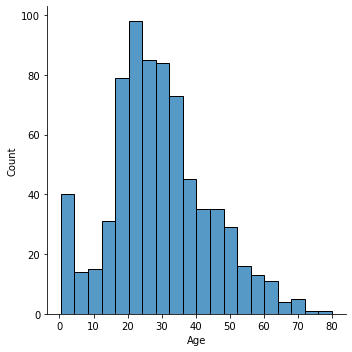

In [29]:
sns.displot(df['Age']) # гистограмма по возрасту пассажиров в самом простом варианте

Посчитать, какой процент мужчин и женщин выжили, какой процент детей выжили

In [30]:
df_adults_survived = new_df[new_df.Age > 17].groupby(['Sex','Survived']).count()
df_adults_survived

Age
Sex    Survived     
female 0          47
       1         159
male   0         325
       1          70

In [31]:
# можем проверить, не потеряли ли в количестве общем 891(общее) - 177(не указан возраст) - 113(дети) = 601
df_adults_survived.Age.sum()

601

In [32]:
male_survived = df_adults_survived['Age'].values[3] / df_adults_survived['Age']['male'].sum() * 100
female_survived = df_adults_survived['Age'].values[1] / df_adults_survived['Age']['female'].sum() * 100

In [34]:
df_children_survived = new_df[new_df.Age < 18].groupby(['Survived']).count()
df_children_survived #помним, что количество детей считали и их было 113 (видим, что ничего не потеряли)

,Sex,Age
Survived,,
0,52,52
1,61,61


In [35]:
children_survived = df_children_survived['Age'].values[1] / df_children_survived['Age'].sum() * 100

In [36]:
print('Процент мужчин выживших на Титанике составляет: ', male_survived.round(2))
print('Процент женщин выживших на Титанике составляет: ', female_survived.round(2))
print('Процент детей выживших на Титанике составляет: ', children_survived.round(2))

Процент мужчин выживших на Титанике составляет:  17.72
Процент женщин выживших на Титанике составляет:  77.18
Процент детей выживших на Титанике составляет:  53.98


### Признаюсь честно, мне совершенно НЕ нравится, как я это все сделал, поэтому я попробовал переделатьпо другому... решение ниже


In [41]:
new_df_ = df[['Survived', 'Sex', 'Age']] # _ - просто потому что второй вариант
new_df_.head()

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


In [42]:
new_df_.shape #проверили, что ничего не потеряли

(891, 3)

In [39]:
# я бы сделал так, если у нас есть М, Ж и Д, то я бы сразу выделил детей в отдельную категорию: 

In [43]:
new_df_.loc[new_df_['Age'] < 18, 'Sex'] = 'child' # меняем 'Sex' у кого возраст <18 на 'child'
new_df_ = new_df_[new_df_.Age > 0] # удаляем строки, где не указан возраст
del new_df_[new_df_.columns [2]] # удаляем столбец 'Age', он нам не нужен
# Важно: если перезапустим дважды, то выдаст ошибку, потому что мы меняем датасет (не хочется давать новое название)

In [44]:
new_df_.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [46]:
new_df_.shape # помним, что у 177 не указан возраст

(714, 2)

In [49]:
total_survived = new_df_.groupby(['Sex']).sum() # получаем выживших по 'Sex'
total_survived

,Survived
Sex,
child,61
female,159
male,70


In [54]:
# для наглядности добавим общее количество на борту и процент выживших
total_survived['total_on_board'] = [len(new_df_[new_df_['Sex']=='child']), len(new_df_[new_df_['Sex']=='female']), len(new_df_[new_df_['Sex']=='male'])]
total_survived.assign(survival_rate = total_survived.Survived / total_survived.total_on_board * 100).round(2)

,Survived,total_on_board,survival_rate
Sex,,,
child,61,113,53.98
female,159,206,77.18
male,70,395,17.72


## явно, все это можно было сделать проще, но как... я, пока, не знаю )